In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

#Import des données 
df_info_rank=pd.read_csv('/Users/maloevain/Desktop/tennisML/Data/Données utiles/info_rank')

df_info_rank.head()


,Unnamed: 0,ranking_date,rank,player_id,points,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,134199,19900101,1,100656,2913.0,Ivan,Lendl,R,19600307.0,USA,188.0,Q182736
1,134465,19900101,2,101414,2279.0,Boris,Becker,R,19671122.0,GER,190.0,Q76334
2,134961,19900101,3,101222,2111.0,Stefan,Edberg,R,19660119.0,SWE,188.0,Q189542
3,135361,19900101,4,100763,1398.0,Brad,Gilbert,R,19610809.0,USA,185.0,Q715134
4,135627,19900101,5,100581,1354.0,John,McEnroe,L,19590216.0,USA,180.0,Q16474


### Visualisation de l'évolution du rang des joueurs au cours du temps

On va créer une fonction qui permet d'afficher l'évolution des joueurs du top 10 et les joueurs entre 40-50 sur une saison

In [25]:
def visualisation_rank(year,dataset):
    
    #on commence par récupérer les infos sur l'année qui nous intéresse
    df_year = dataset[(dataset['ranking_date']>=year*10000) & (dataset['ranking_date']<(year+1)*10000)].copy()  
    
    #On récupère le nom des joueurs appartenant au top 10 et des joueurs entre 40-50
    noms_10 = [nom for nom in df_year[:10]['name_last']]
    noms_40 = [nom for nom in df_year[40:50]['name_last']]
    noms=noms_10+noms_40
    
    plt.figure(figsize=(14,14))
    
    for nom in noms:
        df_individu= df_year[df_year['name_last']==nom].copy()
        df_individu['ranking_date'] = pd.to_datetime(df_individu['ranking_date'], format='%Y%m%d')
        plt.plot(df_individu['ranking_date'],df_individu['rank'],label ='{}'.format(nom))
        plt.xlabel('time')
        plt.ylabel('rang')
    
    plt.show()
        
    

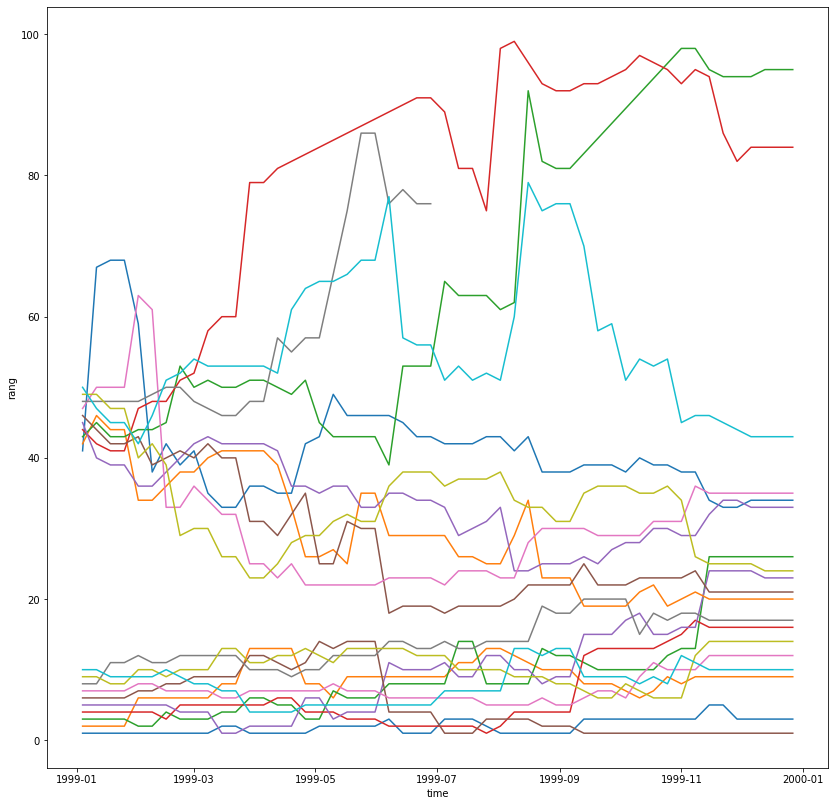

In [26]:
visualisation_rank(1999,df_info_rank)